## EDA Sales notebook

@author abhishekdubey806@gmail.com

# some pandas code to explore metrics and data - - i will write alternate sql statement as well for producing similar results

In [2]:
ls *.csv

 Volume in drive C has no label.
 Volume Serial Number is E469-B94A

 Directory of C:\Users\Admin\Desktop\pythonProject\dummy-data

30-Jan-25  03:28 PM        53,740,547 assessment_dataset(in).csv
               1 File(s)     53,740,547 bytes
               0 Dir(s)  60,968,898,560 bytes free


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("assessment_dataset(in).csv")

In [6]:
df.columns

Index(['TransactionID', 'CustomerID', 'TransactionDate', 'TransactionAmount',
       'PaymentMethod', 'Quantity', 'DiscountPercent', 'City', 'StoreType',
       'CustomerAge', 'CustomerGender', 'LoyaltyPoints', 'ProductName',
       'Region', 'Returned', 'FeedbackScore', 'ShippingCost',
       'DeliveryTimeDays', 'IsPromotional'],
      dtype='object')

In [7]:
df.shape

(500000, 19)

In [8]:
df.describe()

,TransactionID,CustomerID,TransactionAmount,Quantity,DiscountPercent,CustomerAge,LoyaltyPoints,FeedbackScore,ShippingCost,DeliveryTimeDays
count,500000.000000,450000.000000,500000.000000,500000.000000,500000.000000,450000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,250000.500000,25497.193667,20405.325920,7.495510,24.999300,45.995611,4999.839514,3.000750,397.300322,5.239588
std,144337.711635,14139.285267,29618.374948,11.003021,14.428633,16.427616,2882.429452,1.414156,672.473414,3.631072
min,1.000000,1000.000000,-999.990000,1.000000,0.000000,18.000000,0.000000,1.000000,0.000000,1.000000
25%,125000.750000,13252.000000,317.990000,1.000000,12.527500,32.000000,2508.750000,2.000000,18.880000,3.000000
50%,250000.500000,25470.000000,1051.140000,3.000000,24.990000,46.000000,5001.000000,3.000000,48.040000,4.000000
75%,375000.250000,37760.000000,44071.807500,8.000000,37.500000,60.000000,7489.000000,4.000000,402.950000,7.000000
max,500000.000000,49999.000000,99996.890000,50.000000,50.000000,74.000000,9999.000000,5.000000,2500.000000,15.000000


In [9]:
df.dtypes

TransactionID          int64
CustomerID           float64
TransactionDate       object
TransactionAmount    float64
PaymentMethod         object
Quantity               int64
DiscountPercent      float64
City                  object
StoreType             object
CustomerAge          float64
CustomerGender        object
LoyaltyPoints          int64
ProductName           object
Region                object
Returned              object
FeedbackScore          int64
ShippingCost         float64
DeliveryTimeDays       int64
IsPromotional         object
dtype: object

In [10]:
df.head()

,TransactionID,CustomerID,TransactionDate,TransactionAmount,PaymentMethod,Quantity,DiscountPercent,City,StoreType,CustomerAge,CustomerGender,LoyaltyPoints,ProductName,Region,Returned,FeedbackScore,ShippingCost,DeliveryTimeDays,IsPromotional
0,1,16795.0,1/1/2022 0:00,1910.91,Cash,1,35.00,Kolkata,In-Store,32.0,Male,2043,T-Shirt,North,No,4,24.31,5,No
1,2,1860.0,1/1/2022 0:01,58590.27,Cash,1,9.51,Lucknow,Online,40.0,Other,8490,Sofa,West,No,2,1502.96,7,Yes
2,3,39158.0,1/1/2022 0:02,280.21,Debit Card,1,16.55,Lucknow,Online,52.0,Other,6328,Notebook,North,Yes,2,22.30,2,Yes
3,4,NaN,NaN,86485.63,UPI,1,9.53,Jaipur,In-Store,62.0,Other,1139,Laptop,North,No,4,461.38,7,No
4,5,12284.0,1/1/2022 0:04,385.89,Debit Card,22,0.98,Kolkata,Online,31.0,Female,66,Apple,North,No,1,14.44,1,Yes


In [11]:
df.iloc[0].to_dict()

{'TransactionID': 1,
 'CustomerID': 16795.0,
 'TransactionDate': '1/1/2022 0:00',
 'TransactionAmount': 1910.91,
 'PaymentMethod': 'Cash',
 'Quantity': 1,
 'DiscountPercent': 35.0,
 'City': 'Kolkata',
 'StoreType': 'In-Store',
 'CustomerAge': 32.0,
 'CustomerGender': 'Male',
 'LoyaltyPoints': 2043,
 'ProductName': 'T-Shirt',
 'Region': 'North',
 'Returned': 'No',
 'FeedbackScore': 4,
 'ShippingCost': 24.31,
 'DeliveryTimeDays': 5,
 'IsPromotional': 'No'}

# Unique Cities

In [12]:
df['City'].value_counts()

City
Bangalore    50319
Delhi        50215
Lucknow      50190
Kolkata      50141
Ahmedabad    50008
Mumbai       49953
Jaipur       49900
Chennai      49783
Pune         49764
Hyderabad    49727
Name: count, dtype: int64

### Banglore is the most occurring city in dataset

### sql alternative for it would be 
```sql
select City,count(*) as total_mentions from sales_table
group by City;
```

# Age of customer

In [13]:
df['CustomerAge']

0         32.0
1         40.0
2         52.0
3         62.0
4         31.0
          ... 
499995    44.0
499996    60.0
499997    65.0
499998    34.0
499999    30.0
Name: CustomerAge, Length: 500000, dtype: float64

In [14]:
df['CustomerAge'].min() , df['CustomerAge'].max() , df['CustomerAge'].mean()

(18.0, 74.0, 45.99561111111111)

# we can use sql functions min,max,avg on customerage column

<Axes: >

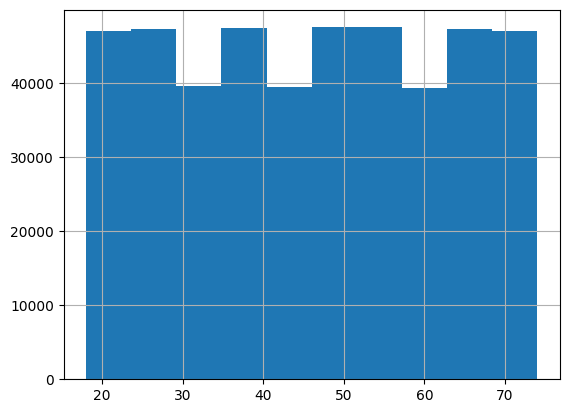

In [15]:
df['CustomerAge'].hist()

In [20]:
def age_group(age):
    if age <= 17:
        return '<=17'
    elif 18 <= age < 30:
        return '18-30'
    elif 30 <= age < 40:
        return '30-40'
    elif 40 <= age < 50:
        return '40-50'
    else:
        return '60+'

In [21]:
df['CustomerAge'].apply(lambda x:age_group(x))

0         30-40
1         40-50
2           60+
3           60+
4         30-40
          ...  
499995    40-50
499996      60+
499997      60+
499998    30-40
499999    30-40
Name: CustomerAge, Length: 500000, dtype: object

In [22]:
df['CustomerAgeGroup'] = df['CustomerAge'].apply(lambda x:age_group(x))

In [23]:
df['CustomerAgeGroup'].value_counts()

CustomerAgeGroup
60+      247207
18-30     94433
30-40     79297
40-50     79063
Name: count, dtype: int64

# Most buyers are from age group 60+ then we have a similar cohort of customers in ranges 30-50 ~ also a good number of customers from 18-30 age group

### sql alternative would be sub query and getting age label count
### Logic : 
#### we do case when for age groups using similar logic for labelling age values and then simply get count of age_group 

# Payment Method and TransactionAmount

In [25]:
df['TransactionAmount']

0          1910.91
1         58590.27
2           280.21
3         86485.63
4           385.89
            ...   
499995      248.11
499996      852.55
499997      334.78
499998    99480.04
499999    33158.78
Name: TransactionAmount, Length: 500000, dtype: float64

In [27]:
df['TransactionAmount'].sum() ### total transaction amount


10202662960.19

In [28]:
df['PaymentMethod'].value_counts()

PaymentMethod
Debit Card     113015
Cash           112625
UPI            112517
Credit Card    111843
Name: count, dtype: int64

# total transaction amount by payment method


In [33]:
df.groupby('PaymentMethod').agg({"TransactionAmount":"sum"}) / 1000000
### adjusting to 10^6 ~~ 2556.679197 => 2.56 * 10^9 

## most transaction amount collected was done through cash

,TransactionAmount
PaymentMethod,
Cash,2556.679197
Credit Card,2517.706936
Debit Card,2552.366144
UPI,2530.177440


## we can use a similar logic in sql with group by on payment method and sum on transaction amount

## Also transaction over city

In [36]:
df.groupby('City').agg({"TransactionAmount":"sum"}) / 1000000
### 1.023 * 10^9  for Ahemdabad 

,TransactionAmount
City,
Ahmedabad,1023.675900
Bangalore,1022.379946
Chennai,1022.122711
Delhi,1021.352525
Hyderabad,1008.892393
Jaipur,1015.044078
Kolkata,1027.325508
Lucknow,1021.207908
Mumbai,1018.525531


# payment method popular in city

In [39]:
df.groupby(['City','PaymentMethod']).size().unstack(fill_value=0)
### by counting payment method over cities ---

## sql alternative would be to use sum case when ---- 1 else 0 
### this is just count of payment method over cities

PaymentMethod,Cash,Credit Card,Debit Card,UPI
City,,,,
Ahmedabad,11225,11248,11294,11247
Bangalore,11361,11344,11404,11227
Chennai,11103,11193,11268,11210
Delhi,11377,11275,11112,11419
Hyderabad,11137,11164,11231,11286
Jaipur,11214,11178,11319,11132
Kolkata,11212,11284,11417,11126
Lucknow,11270,11078,11402,11518
Mumbai,11410,11014,11287,11229


In [42]:
df.groupby(['City','PaymentMethod']).agg({"TransactionAmount":"sum"}).unstack(fill_value=0) / 1000000
### by summing TransactionAmount over cities and PaymentMethod ---

## sql alternative would be to use sum case when ----  else 0 


TransactionAmount                                    
PaymentMethod              Cash Credit Card  Debit Card         UPI
City                                                               
Ahmedabad            252.553910  258.348594  257.856763  250.385467
Bangalore            259.354403  251.251052  258.625695  248.543165
Chennai              253.661325  255.151930  255.417844  253.346762
Delhi                256.025984  253.350910  249.427102  257.969056
Hyderabad            252.993881  253.923838  248.761810  248.667374
Jaipur               255.045612  250.713168  253.686796  250.989176
Kolkata              260.504777  250.731368  257.309246  254.133638
Lucknow              250.820851  248.116479  256.416877  261.335834
Mumbai               260.384934  247.269787  253.263997  252.993988
Pune                 255.333521  248.849811  261.600013  251.812980

In [43]:
df['TransactionDate']

0           1/1/2022 0:00
1           1/1/2022 0:01
2           1/1/2022 0:02
3                     NaN
4           1/1/2022 0:04
               ...       
499995    12/14/2022 5:15
499996    12/14/2022 5:16
499997    12/14/2022 5:17
499998    12/14/2022 5:18
499999    12/14/2022 5:19
Name: TransactionDate, Length: 500000, dtype: object

In [44]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [45]:
df['TransactionDate']

0        2022-01-01 00:00:00
1        2022-01-01 00:01:00
2        2022-01-01 00:02:00
3                        NaT
4        2022-01-01 00:04:00
                 ...        
499995   2022-12-14 05:15:00
499996   2022-12-14 05:16:00
499997   2022-12-14 05:17:00
499998   2022-12-14 05:18:00
499999   2022-12-14 05:19:00
Name: TransactionDate, Length: 500000, dtype: datetime64[ns]

In [46]:
df['TransactionDate'].min()

Timestamp('2022-01-01 00:00:00')

In [47]:
df['TransactionDate'].max()

Timestamp('2022-12-14 05:19:00')

In [51]:
df['TransactionDate'].dt.to_period('M').value_counts().sort_index()

TransactionDate
2022-01    40098
2022-02    36208
2022-03    40247
2022-04    38941
2022-05    40196
2022-06    38785
2022-07    40199
2022-08    40267
2022-09    38906
2022-10    40202
2022-11    38831
2022-12    17120
Freq: M, Name: count, dtype: int64

## monthly sales - - clearly sales declined in the last month of calendar

# in sql either we could cast to datetime and get YYYY-MM using if else if not null or simply get first 6 characters using left to get YYYY-MM

In [52]:
df.groupby([df['TransactionDate'].dt.to_period('M')]).agg({"TransactionAmount":"sum"}) / 1000000

,TransactionAmount
TransactionDate,
2022-01,814.518653
2022-02,744.181785
2022-03,818.874213
2022-04,801.872067
2022-05,819.562672
2022-06,790.468924
2022-07,817.029613
2022-08,822.157143
2022-09,791.350040


# top selling products

In [54]:
df['ProductName'].value_counts()
## Notebook   and T shirts are most soled items

ProductName
Notebook    90294
T-Shirt     90187
Apple       89970
Laptop      89809
Sofa        89740
Name: count, dtype: int64

# using below matrix we can identify which products are popular in each city

In [57]:
df.groupby(['City','ProductName']).size().unstack(fill_value=0)


ProductName,Apple,Laptop,Notebook,Sofa,T-Shirt
City,,,,,
Ahmedabad,8777,8987,9140,9032,9078
Bangalore,9192,9034,9148,8980,8982
Chennai,8954,8967,8919,9067,8867
Delhi,9074,9035,9148,8892,9034
Hyderabad,9044,8819,8885,8946,9124
Jaipur,8997,8924,8844,8952,9126
Kolkata,9092,9048,8969,8967,8963
Lucknow,8987,9030,9314,8890,9047
Mumbai,8810,8994,9115,8984,9037


In [55]:
df.groupby(['City','ProductName']).agg({"TransactionAmount":"sum"}).unstack(fill_value=0) / 1000000


TransactionAmount                                             
ProductName             Apple      Laptop  Notebook        Sofa    T-Shirt
City                                                                      
Ahmedabad            2.158772  622.102882  2.443590  382.123286  10.316204
Bangalore            2.290128  626.188197  2.451865  376.633285  10.210840
Chennai              2.215322  622.045582  2.377532  380.894274  10.045151
Delhi                2.222661  628.286897  2.415119  373.605214  10.243162
Hyderabad            2.252713  612.341604  2.381800  376.999819  10.370968
Jaipur               2.249538  619.659636  2.367839  375.832352  10.325388
Kolkata              2.258597  628.436807  2.408126  379.400358  10.175140
Lucknow              2.256152  628.282465  2.486243  373.386165  10.279016
Mumbai               2.167911  621.719422  2.413363  377.391077  10.220932
Pune                 2.228924  622.156939  2.334110  380.757074  10.119277

# by region

In [59]:
df.groupby(['Region','ProductName']).size().unstack(fill_value=0)


ProductName,Apple,Laptop,Notebook,Sofa,T-Shirt
Region,,,,,
East,23264,23516,23227,23330,23238
North,19238,19189,19354,19173,19212
South,28306,28019,28255,28160,28352
West,19162,19085,19458,19077,19385


In [58]:
df.groupby(['Region','ProductName']).agg({"TransactionAmount":"sum"}).unstack(fill_value=0) / 1000000


TransactionAmount                                               
ProductName             Apple       Laptop  Notebook         Sofa    T-Shirt
Region                                                                      
East                 5.798542  1627.993804  6.165187   986.521458  26.342545
North                4.771371  1335.377966  5.145518   804.488995  21.718848
South                7.006138  1943.998743  7.542528  1181.920032  32.226195
West                 4.724667  1323.849917  5.226353   804.092418  22.018492

In [62]:
# by store type

In [61]:
df.groupby(['StoreType','ProductName']).size().unstack(fill_value=0)


ProductName,Apple,Laptop,Notebook,Sofa,T-Shirt
StoreType,,,,,
In-Store,44793,44867,45043,45120,44959
Online,45177,44942,45251,44620,45228


In [60]:
df.columns

Index(['TransactionID', 'CustomerID', 'TransactionDate', 'TransactionAmount',
       'PaymentMethod', 'Quantity', 'DiscountPercent', 'City', 'StoreType',
       'CustomerAge', 'CustomerGender', 'LoyaltyPoints', 'ProductName',
       'Region', 'Returned', 'FeedbackScore', 'ShippingCost',
       'DeliveryTimeDays', 'IsPromotional', 'CustomerAgeGroup'],
      dtype='object')

In [63]:
df['FeedbackScore']

0         4
1         2
2         2
3         4
4         1
         ..
499995    2
499996    2
499997    5
499998    2
499999    1
Name: FeedbackScore, Length: 500000, dtype: int64

In [64]:
df['FeedbackScore'].min() , df['FeedbackScore'].max(),  df['FeedbackScore'].mean()

(1, 5, 3.00075)

## Rating distribution -- over region

In [68]:
df.groupby(['StoreType','FeedbackScore']).size().unstack(fill_value=0)


FeedbackScore,1,2,3,4,5
StoreType,,,,,
In-Store,44866,44896,45038,45037,44945
Online,45048,45324,44460,45249,45137


In [70]:
df.groupby(['StoreType']).agg({"FeedbackScore":"mean"})
## average rating --

,FeedbackScore
StoreType,
In-Store,3.001330
Online,3.000457


In [71]:
df.groupby(['Region']).agg({"FeedbackScore":"mean"})

,FeedbackScore
Region,
East,3.002144
North,3.005938
South,2.992739
West,3.005896


In [72]:
df.groupby(['ProductName']).agg({"FeedbackScore":"mean"})

,FeedbackScore
ProductName,
Apple,3.003401
Laptop,2.996715
Notebook,3.002636
Sofa,3.004970
T-Shirt,2.996751


## average rating seems to be 3 across multiple combinations

In [73]:
df.groupby(['IsPromotional']).agg({"FeedbackScore":"mean"})

,FeedbackScore
IsPromotional,
No,2.998875
Yes,3.002635


In [74]:
df.groupby(['Returned']).agg({"FeedbackScore":"mean"})

,FeedbackScore
Returned,
No,3.001405
Yes,3.000092


## ShippingCost by region and city

In [75]:
df.groupby(['Returned']).agg({"ShippingCost":"mean"})

,ShippingCost
Returned,
No,397.672916
Yes,396.926136


In [76]:
df.groupby(['Region']).agg({"ShippingCost":"mean"})

,ShippingCost
Region,
East,430.123973
North,435.795074
South,422.162891
West,434.404545


# South has a slightly lower shipping cost

In [77]:
df.groupby(['City']).agg({"ShippingCost":"mean"})

,ShippingCost
City,
Ahmedabad,399.469471
Bangalore,396.232916
Chennai,402.379387
Delhi,393.582517
Hyderabad,397.072980
Jaipur,396.159000
Kolkata,396.772536
Lucknow,393.436444
Mumbai,397.530238


In [78]:
df.groupby(['ProductName']).agg({"ShippingCost":"mean"})

,ShippingCost
ProductName,
Apple,12.485168
Laptop,350.009404
Notebook,25.016592
Sofa,1750.081490
T-Shirt,47.438716


## clearly Sofa has the highest shipping cost

In [80]:
df.groupby(['StoreType']).agg({"ShippingCost":"mean"})

,ShippingCost
StoreType,
In-Store,438.696403
Online,433.072608


# total spent on shipping monthly --

In [84]:
df.groupby([df['TransactionDate'].dt.to_period('M')]).agg({"ShippingCost":"sum"}) / 1000000
### lower sales => lower shipping costs

,ShippingCost
TransactionDate,
2022-01,15.994426
2022-02,14.348700
2022-03,16.020366
2022-04,15.529375
2022-05,15.937591
2022-06,15.337163
2022-07,16.004366
2022-08,16.179778
2022-09,15.489446


In [87]:
k = df.groupby([df['TransactionDate'].dt.to_period('M') , 'StoreType']).agg({"ShippingCost":"sum"}).unstack(fill_value=0)


In [88]:
k/ 1000000

ShippingCost          
StoreType           In-Store    Online
TransactionDate                       
2022-01             8.014837  7.779665
2022-02             7.193294  6.968753
2022-03             7.966998  7.858852
2022-04             7.647294  7.691221
2022-05             7.952663  7.781731
2022-06             7.570429  7.572292
2022-07             7.891524  7.913448
2022-08             8.018386  7.961192
2022-09             7.705858  7.582911
2022-10             7.836012  7.777493
2022-11             7.680571  7.493836
2022-12             3.377263  3.236882

In [89]:
k = df.groupby([df['TransactionDate'].dt.to_period('M') , 'ProductName']).agg({"ShippingCost":"sum"}).unstack(fill_value=0)


In [93]:
k / 1000000

ShippingCost                                         
ProductName            Apple    Laptop  Notebook       Sofa   T-Shirt
TransactionDate                                                      
2022-01             0.091278  2.505105  0.178956  12.674535  0.344629
2022-02             0.081006  2.284087  0.165005  11.328039  0.303911
2022-03             0.091136  2.507815  0.183081  12.700428  0.343390
2022-04             0.087372  2.477088  0.173230  12.264495  0.336330
2022-05             0.090986  2.535358  0.182837  12.586600  0.338613
2022-06             0.087430  2.438836  0.172522  12.103098  0.340834
2022-07             0.089459  2.522466  0.185447  12.663295  0.344305
2022-08             0.089016  2.509341  0.182375  12.850628  0.348218
2022-09             0.087474  2.427527  0.173599  12.268433  0.331736
2022-10             0.091059  2.497740  0.183320  12.500191  0.341195
2022-11             0.086972  2.495203  0.175055  12.085087  0.332090
2022-12             0.038245  1.070504  0.078270   5.281732  0.145393

In [94]:
df.columns

Index(['TransactionID', 'CustomerID', 'TransactionDate', 'TransactionAmount',
       'PaymentMethod', 'Quantity', 'DiscountPercent', 'City', 'StoreType',
       'CustomerAge', 'CustomerGender', 'LoyaltyPoints', 'ProductName',
       'Region', 'Returned', 'FeedbackScore', 'ShippingCost',
       'DeliveryTimeDays', 'IsPromotional', 'CustomerAgeGroup'],
      dtype='object')

## most loyal customer--

In [116]:
t = df.groupby('CustomerID').agg({"TransactionID":"count","TransactionAmount":"sum","LoyaltyPoints":"sum"
                                 }).reset_index()

In [117]:
t.columns = ['cust_id','totalsales','totaltransamount','totalloyalty']

In [118]:
t

,cust_id,totalsales,totaltransamount,totalloyalty
0,1000.0,5,193364.03,24243
1,1001.0,15,424405.52,84685
2,1002.0,10,193249.15,51243
3,1003.0,14,193738.95,72539
4,1004.0,8,310568.49,44074
...,...,...,...,...
48989,49995.0,6,266684.08,40764
48990,49996.0,10,321748.14,61340
48991,49997.0,13,157457.37,57813
48992,49998.0,19,575784.88,97919


# most purchases done by : 

In [119]:
t.sort_values('totalsales').tail(10)

,cust_id,totalsales,totaltransamount,totalloyalty
2781,3781.0,21,456660.85,97167
14273,15274.0,21,499861.11,110756
27139,28140.0,22,750696.90,91492
19342,20343.0,22,489681.73,97127
23924,24925.0,22,336947.79,128162
17628,18629.0,22,501611.61,108332
2353,3353.0,23,258066.84,109835
4617,5617.0,23,384885.64,104632
38398,39402.0,24,558436.27,130699
34170,35173.0,24,334919.38,122054


# highest spender -- with most transaction amount

In [120]:
t.sort_values('totaltransamount').tail(10)

,cust_id,totalsales,totaltransamount,totalloyalty
910,1910.0,13,698656.27,57586
27255,28256.0,14,732385.24,72462
17110,18111.0,16,740229.76,78937
27139,28140.0,22,750696.90,91492
16918,17919.0,18,762414.23,102694
8502,9502.0,19,763669.57,108567
16751,17752.0,18,769126.59,81702
9494,10494.0,14,773034.52,50518
38728,39732.0,16,773331.78,110056
31457,32460.0,20,800724.49,107550


In [121]:
t.sort_values('totalloyalty').tail(10)

,cust_id,totalsales,totaltransamount,totalloyalty
27720,28722.0,17,464022.73,118548
46571,47577.0,19,341563.03,118568
6539,7539.0,18,523237.97,118918
18242,19243.0,21,330088.80,119030
34170,35173.0,24,334919.38,122054
43179,44185.0,20,309611.32,123424
23924,24925.0,22,336947.79,128162
38398,39402.0,24,558436.27,130699
14833,15834.0,19,560128.75,131318
12497,13497.0,20,594787.52,132369


# what did they spent on?

In [122]:
l = t.sort_values('totaltransamount').tail(10)['cust_id']

In [123]:
l

910       1910.0
27255    28256.0
17110    18111.0
27139    28140.0
16918    17919.0
8502      9502.0
16751    17752.0
9494     10494.0
38728    39732.0
31457    32460.0
Name: cust_id, dtype: float64

In [124]:
filt = df[df['CustomerID'].isin(l)]

In [125]:
filt

,TransactionID,CustomerID,TransactionDate,TransactionAmount,PaymentMethod,Quantity,DiscountPercent,City,StoreType,CustomerAge,CustomerGender,LoyaltyPoints,ProductName,Region,Returned,FeedbackScore,ShippingCost,DeliveryTimeDays,IsPromotional,CustomerAgeGroup
1554,1555,9502.0,2022-01-02 01:54:00,330.59,UPI,8,41.06,Hyderabad,Online,64.0,Other,105,Notebook,North,Yes,4,36.10,4,No,60+
13083,13084,1910.0,2022-01-10 02:03:00,60177.11,Credit Card,1,5.58,Bangalore,In-Store,68.0,Male,6433,Laptop,South,Yes,5,489.33,4,Yes,60+
15670,15671,28140.0,2022-01-11 21:10:00,1937.72,NaN,15,19.33,Delhi,NaN,NaN,NaN,9758,NaN,South,No,4,41.99,2,No,60+
16661,16662,39732.0,2022-01-12 13:41:00,1838.22,Debit Card,2,45.97,Lucknow,Online,23.0,Other,7700,T-Shirt,South,No,1,49.90,5,Yes,18-30
19568,19569,28256.0,2022-01-14 14:08:00,47146.02,Credit Card,1,2.20,Pune,In-Store,41.0,Other,9089,Laptop,North,No,3,196.31,3,No,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494306,494307,1910.0,2022-12-10 06:26:00,38916.36,Credit Card,1,17.75,Jaipur,In-Store,48.0,Female,6634,Sofa,West,Yes,3,1471.81,11,Yes,40-50
494606,494607,9502.0,2022-12-10 11:26:00,119.67,Debit Card,39,22.62,Delhi,Online,60.0,Other,8393,Apple,South,No,4,16.08,2,No,60+
495007,495008,17752.0,2022-12-10 18:07:00,82.13,Cash,2,42.77,Bangalore,Online,50.0,Female,9921,Notebook,South,No,1,23.25,5,No,60+
496941,496942,10494.0,2022-12-12 02:21:00,91292.46,UPI,1,26.24,Hyderabad,Online,27.0,Male,3977,Laptop,West,Yes,1,195.66,3,No,18-30


In [126]:
filt['ProductName'].value_counts()

ProductName
Laptop      76
Sofa        38
Apple       19
Notebook    16
T-Shirt     13
Name: count, dtype: int64

In [127]:
filt['Region'].value_counts()

Region
South    54
East     41
West     38
North    31
Name: count, dtype: int64

# our top customer spent most on Laptop and Sofa - and are from south and east


In [128]:
filt['City'].value_counts()


City
Jaipur       24
Hyderabad    20
Mumbai       19
Delhi        17
Bangalore    16
Pune         16
Ahmedabad    16
Chennai      16
Kolkata      14
Lucknow      12
Name: count, dtype: int64

In [129]:
filt['TransactionDate'].dt.to_period("M").value_counts().sort_index()


TransactionDate
2022-01    12
2022-02    14
2022-03    15
2022-04    15
2022-05    18
2022-06     8
2022-07    22
2022-08    14
2022-09    18
2022-10    15
2022-11    12
2022-12     7
Freq: M, Name: count, dtype: int64

In [130]:
filt['StoreType'].value_counts()


StoreType
Online      90
In-Store    72
Name: count, dtype: int64

### they mostly bought from Online store

In [131]:
filt['LoyaltyPoints'].sum()## loyal points to top spenders

861564

# overall loyalty points distribution over region , product

In [135]:
df.groupby('Region').agg({"LoyaltyPoints":"sum"}) / 1000000

,LoyaltyPoints
Region,
East,594.606592
North,480.124899
South,731.312441
West,480.461575


In [136]:
df.groupby('City').agg({"LoyaltyPoints":"sum"}) / 1000000

,LoyaltyPoints
City,
Ahmedabad,249.461390
Bangalore,250.934157
Chennai,249.308293
Delhi,251.325197
Hyderabad,248.324407
Jaipur,249.328723
Kolkata,251.505808
Lucknow,251.423580
Mumbai,249.690149


In [137]:
df.groupby('ProductName').agg({"LoyaltyPoints":"sum"}) / 1000000

,LoyaltyPoints
ProductName,
Apple,448.967388
Laptop,448.908644
Notebook,451.066159
Sofa,449.894057
T-Shirt,450.966703


In [138]:
df.groupby('StoreType').agg({"LoyaltyPoints":"sum"}) / 1000000

,LoyaltyPoints
StoreType,
In-Store,1124.213966
Online,1125.588985
